### 1) Use the given dataset and read the dataset with the names of the attribute to the dataset?

In [153]:
import pandas as pd
import numpy as np

In [88]:
data = pd.read_csv("carevaluation.csv")
data.loc[1728] = data.columns
data.columns = ['buying','maint','doors','persons','lug_boot','safety','class']
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [89]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [90]:
data.shape

(1728, 7)

In [91]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

### 2) Check the information from the dataset and do the data processing by converting everthing into numeric form?

In [92]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [99]:
# for i in data[['buying','maint','lug_boot','safety','class']]:
for i in data:
    data[i] = enc.fit_transform(data[i])
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


### 3) Split the dataset into training and testing portions?

In [101]:
x = data.drop('class',axis=1)
y = data['class']

In [143]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
x_train.shape,x_test.shape

((1209, 6), (519, 6))

### 4) Fit the KNN model?

In [144]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [145]:
from sklearn.metrics import accuracy_score
pred = knn.predict(x_test)
accuracy_score(y_test,pred)

0.9229287090558767

In [150]:
knn.predict([[3,3,0,0,2,2]]) # It should give class as 2

array([2], dtype=int64)

### 5) Choose the best k value within range of 25 and also calculate accuracy for each k value from 1 to 25?

In [151]:
import matplotlib.pyplot as plt
r = range(1,26)
accuracies = []
for k in r:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    accuracies.append(accuracy_score(y_test,y_pred)) 

In [152]:
acc = pd.Series(accuracies)
a = acc[acc.idxmax()]
print("The maximum accuracy is {} at k = {}".format(a,acc.idxmax()+1))

The maximum accuracy is 0.9229287090558767 at k = 5


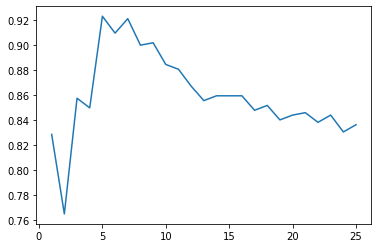

In [148]:
plt.plot(r,accuracies)